# Try to find the original dataset image for the test on the decomposition for Slot Attention paper since it was not given 

### Try template matching based on the obtained mask 

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

def template_matching(template_path, image_path):
    # read the template and image
    template = cv2.imread(template_path, 0)
    image = cv2.imread(image_path, 0)

    # Check if images are loaded correctly
    if template is None:
        print(f"Failed to load template: {template_path}")
        return False
    if image is None:
        print(f"Failed to load image: {image_path}")
        return False

    # resize the template to be slightly smaller than the image
    template = cv2.resize(template, (int(image.shape[1] * 0.9), int(image.shape[0] * 0.9)))

    # compute the Canny edge detection
    template_edges = cv2.Canny(template, 50, 150)
    image_edges = cv2.Canny(image, 50, 150)

    # get the height and width of the template
    h, w = template_edges.shape

    # perform the template matching
    res = cv2.matchTemplate(image_edges, template_edges, cv2.TM_CCOEFF_NORMED)
    threshold = 0.3  # Lowering the threshold
    loc = np.where(res >= threshold)

    # Debug: print the matching result
    print(f"Matching result for image: {image_path}, max value: {res.max()}")

    # check if there are any matches
    if len(loc[0]) > 0:
        return True
    return False

def display_canny_edge(image_path):
    # read the image
    image = cv2.imread(image_path, 0)

    # Check if the image is loaded correctly
    if image is None:
        print(f"Failed to load image: {image_path}")
        return

    # compute the Canny edge detection
    image_edges = cv2.Canny(image, 50, 150)

    # display the Canny edge detection result
    plt.imshow(image_edges, cmap='gray')
    plt.title(f"Canny Edge Detection for {os.path.basename(image_path)}")
    plt.axis('off')
    plt.show()

def main():
    # get the template image and image folder
    template_path = '/Users/marinemoutarlier/Desktop/templatee.png' # path to the template image
    image_folder = '/Users/marinemoutarlier/Downloads/CLEVR_v1.0/images/test' # path to the image folder

    # get the list of images in the folder
    images = os.listdir(image_folder)

    # list to store IDs of similar images
    similar_images = []

    # loop through the images and perform template matching
    for image in images:
        image_path = os.path.join(image_folder, image)
        if template_matching(template_path, image_path):
            similar_images.append(image)

    # print the IDs of similar images
    print("Similar images:")
    for img_id in similar_images:
        print(img_id)

    # Display Canny edge detection for the first image in the dataset
    if images:
        display_canny_edge(os.path.join(image_folder, images[0]))

if __name__ == '__main__':
    main()


In [ ]:
from multi_object_datasets import clevr_with_masks
import tensorflow as tf
import matplotlib.pyplot as plt

tf_records_path = 'clevr_with_masks_train.tfrecords'
batch_size = 32

# Create the dataset
dataset = clevr_with_masks.dataset(tf_records_path, batch_size)
batched_dataset = dataset.batch(batch_size)  # optional batching

# Iterate over the dataset and display the images and masks
for batch in batched_dataset.take(1):  # Take one batch for visualization
    # Print the keys available in the batch
    print(batch.keys())
    
    images = batch['image']
    masks = batch['mask']
    
    for i in range(len(images)):
        image = images[i].numpy()
        mask = masks[i].numpy()
        
        # Print the shape of the mask
        print(f"Original mask shape: {mask.shape}")
        
        # Iterate over each mask for the image
        for j in range(mask.shape[0]):
            single_mask = mask[j, :, :, 0]
            
            # Print the shape of the single mask
            print(f"Single mask shape: {single_mask.shape}")
            
            plt.figure(figsize=(10, 5))
            
            # Display the image
            plt.subplot(1, 2, 1)
            plt.imshow(image)
            plt.title("Image")
            plt.axis('off')
            
            # Display the mask
            plt.subplot(1, 2, 2)
            plt.imshow(single_mask, cmap='gray')
            plt.title(f"Mask {j+1}")
            plt.axis('off')
            
            plt.show()

### No luck, then browse through the orginal dataset and decode the tfrecords file given that contains the dataset. Visualize the decoded images from the tfrecords + Only the first mask that contains all the objects.

dict_keys(['color', 'image', 'mask', 'material', 'pixel_coords', 'rotation', 'shape', 'size', 'visibility', 'x', 'y', 'z'])
Original mask shape: (11, 240, 320, 1)
First mask shape: (240, 320)


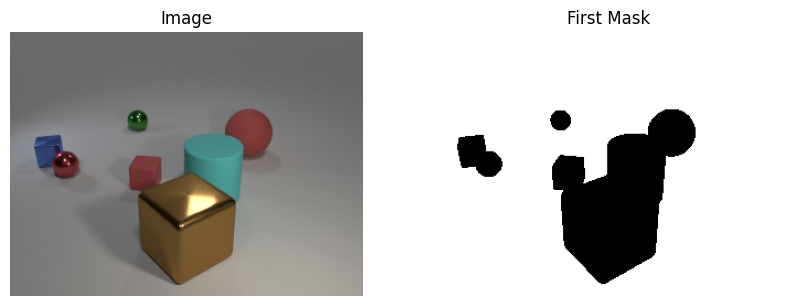

Original mask shape: (11, 240, 320, 1)
First mask shape: (240, 320)


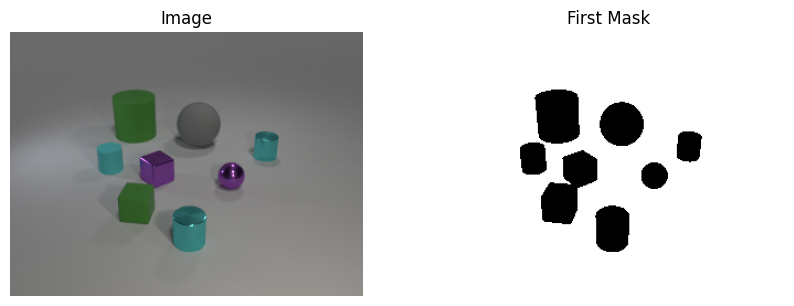

Original mask shape: (11, 240, 320, 1)
First mask shape: (240, 320)


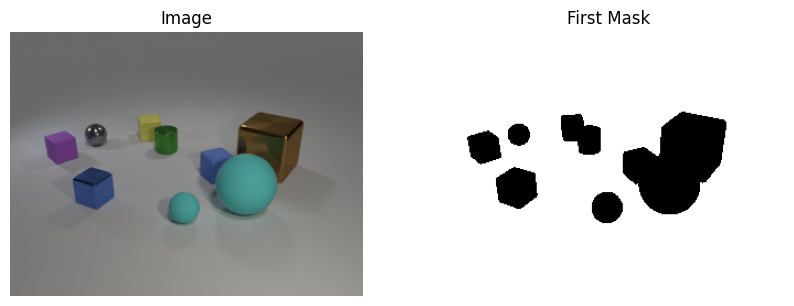

Original mask shape: (11, 240, 320, 1)
First mask shape: (240, 320)


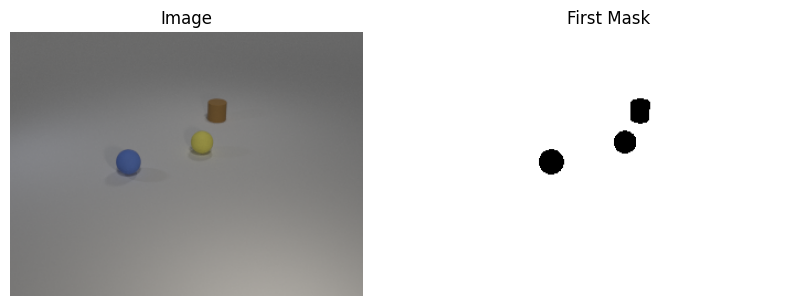

Original mask shape: (11, 240, 320, 1)
First mask shape: (240, 320)


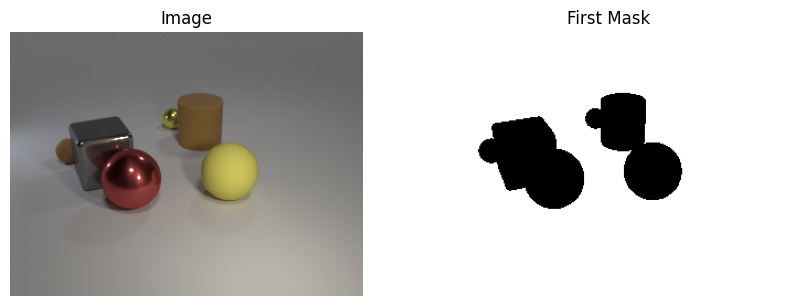

Original mask shape: (11, 240, 320, 1)
First mask shape: (240, 320)


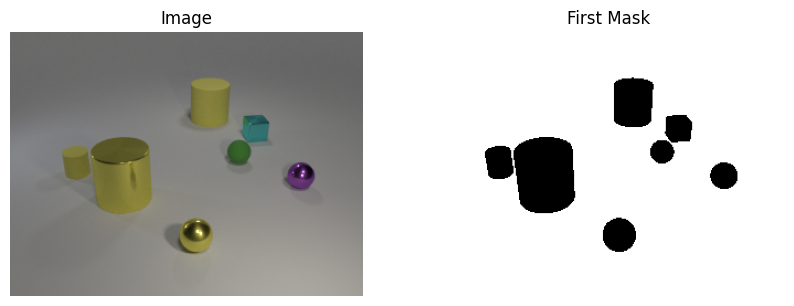

Original mask shape: (11, 240, 320, 1)
First mask shape: (240, 320)


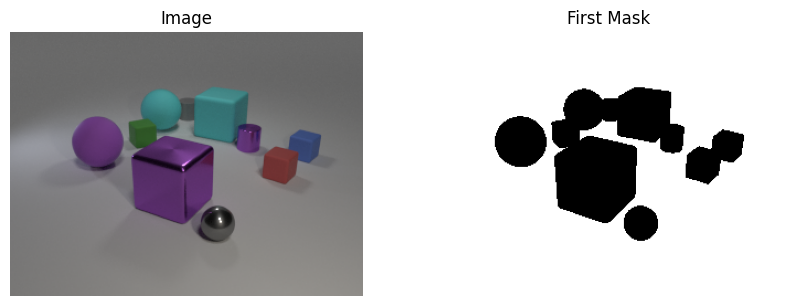

Original mask shape: (11, 240, 320, 1)
First mask shape: (240, 320)


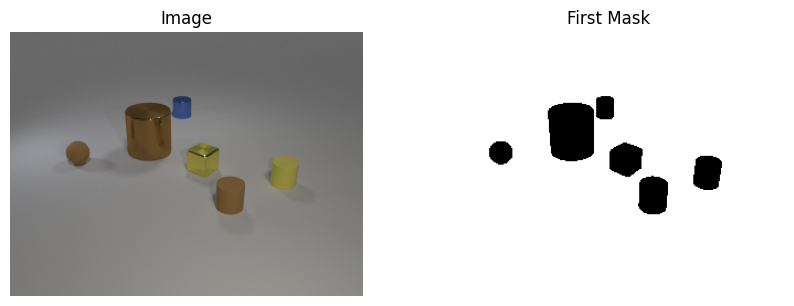

Original mask shape: (11, 240, 320, 1)
First mask shape: (240, 320)


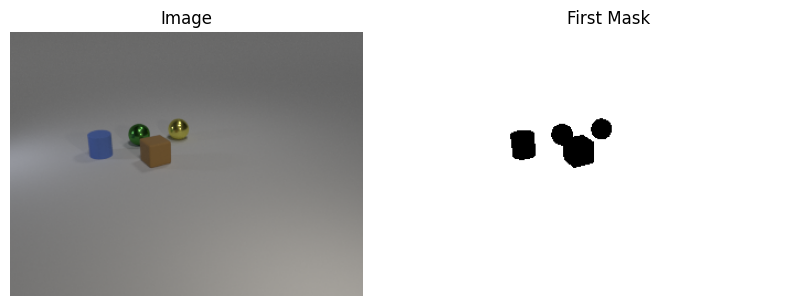

Original mask shape: (11, 240, 320, 1)
First mask shape: (240, 320)


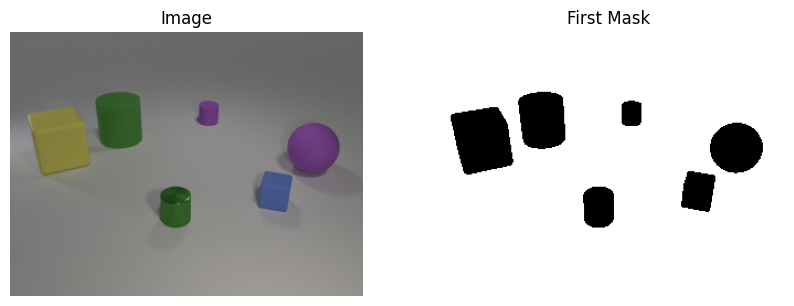

Original mask shape: (11, 240, 320, 1)
First mask shape: (240, 320)


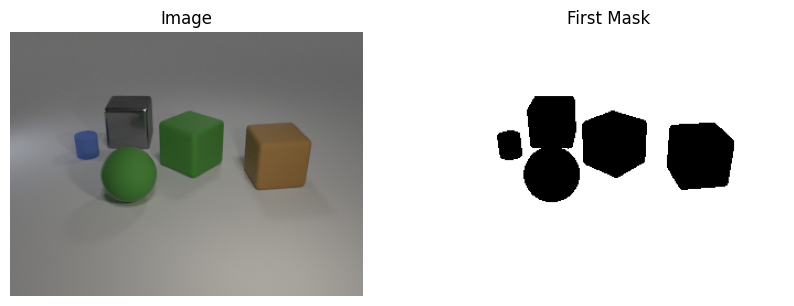

Original mask shape: (11, 240, 320, 1)
First mask shape: (240, 320)


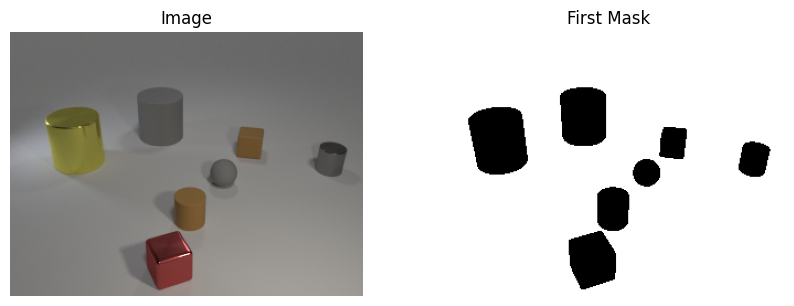

Original mask shape: (11, 240, 320, 1)
First mask shape: (240, 320)


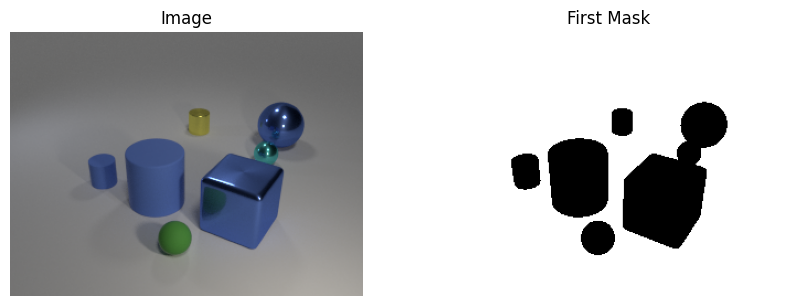

Original mask shape: (11, 240, 320, 1)
First mask shape: (240, 320)


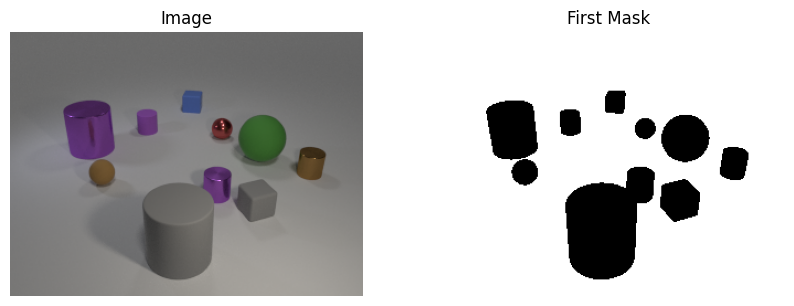

Original mask shape: (11, 240, 320, 1)
First mask shape: (240, 320)


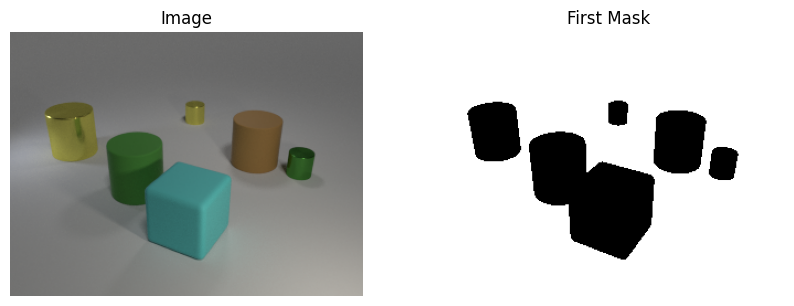

Original mask shape: (11, 240, 320, 1)
First mask shape: (240, 320)


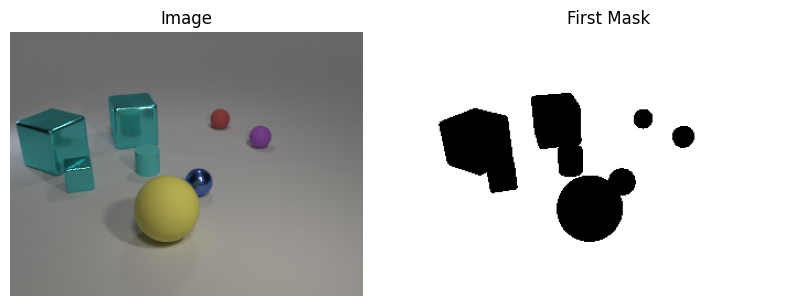

Original mask shape: (11, 240, 320, 1)
First mask shape: (240, 320)


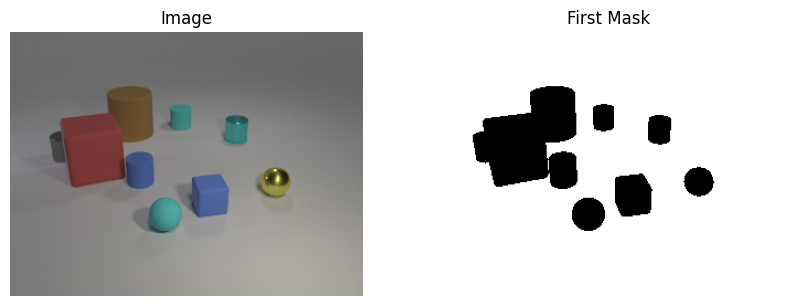

Original mask shape: (11, 240, 320, 1)
First mask shape: (240, 320)


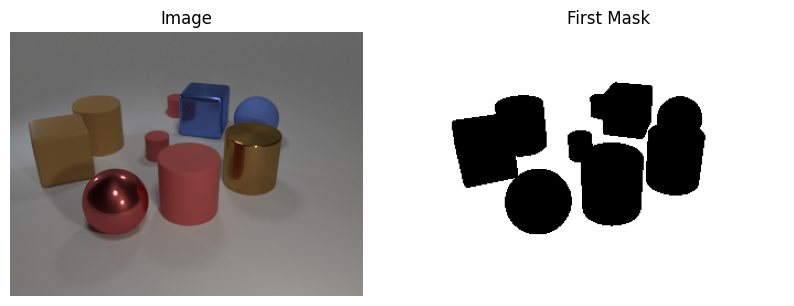

Original mask shape: (11, 240, 320, 1)
First mask shape: (240, 320)


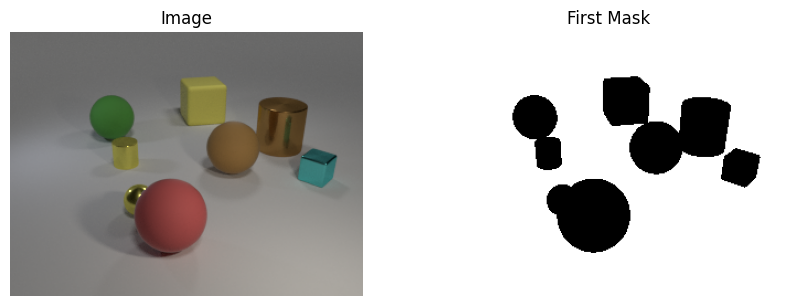

Original mask shape: (11, 240, 320, 1)
First mask shape: (240, 320)


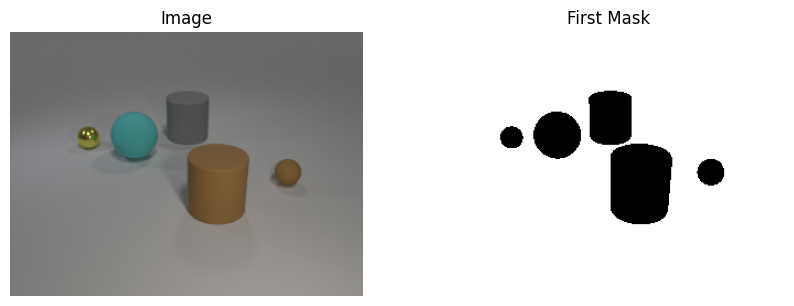

Original mask shape: (11, 240, 320, 1)
First mask shape: (240, 320)


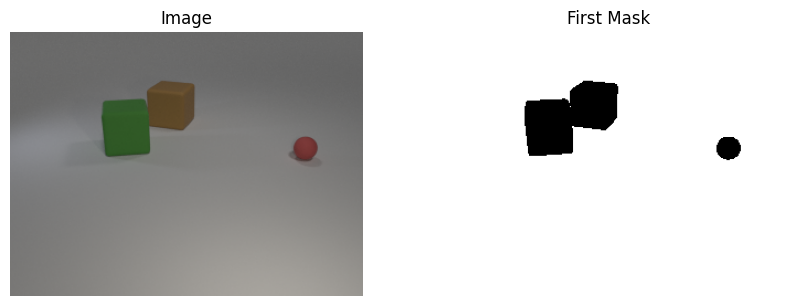

Original mask shape: (11, 240, 320, 1)
First mask shape: (240, 320)


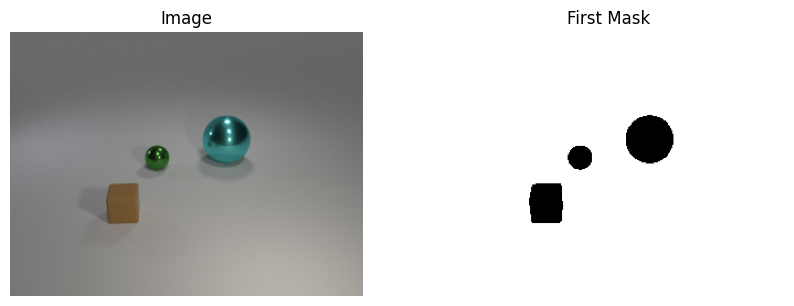

Original mask shape: (11, 240, 320, 1)
First mask shape: (240, 320)


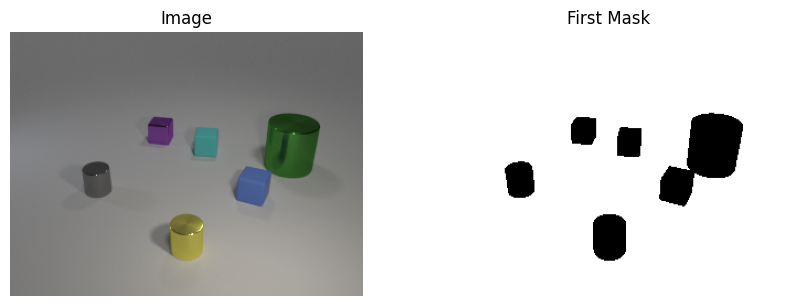

Original mask shape: (11, 240, 320, 1)
First mask shape: (240, 320)


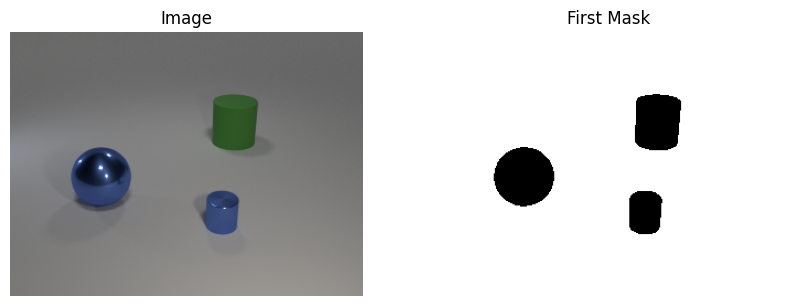

Original mask shape: (11, 240, 320, 1)
First mask shape: (240, 320)


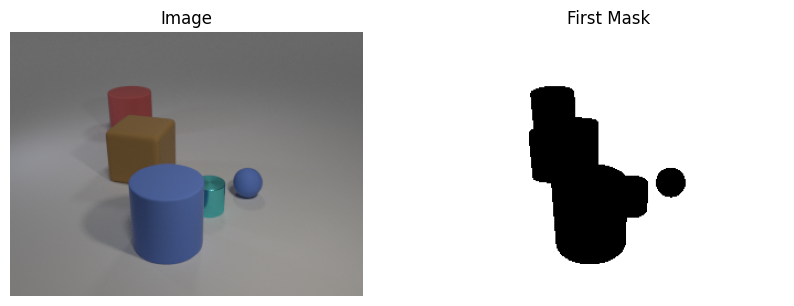

Original mask shape: (11, 240, 320, 1)
First mask shape: (240, 320)


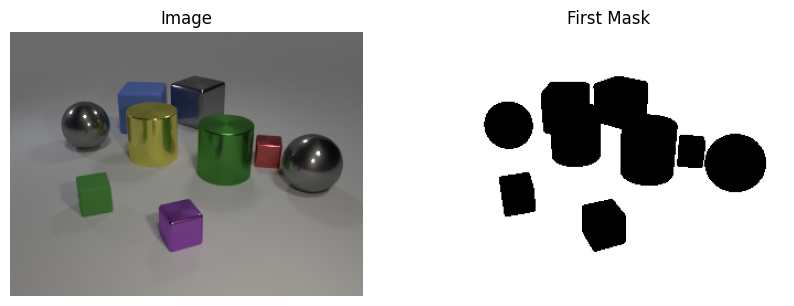

Original mask shape: (11, 240, 320, 1)
First mask shape: (240, 320)


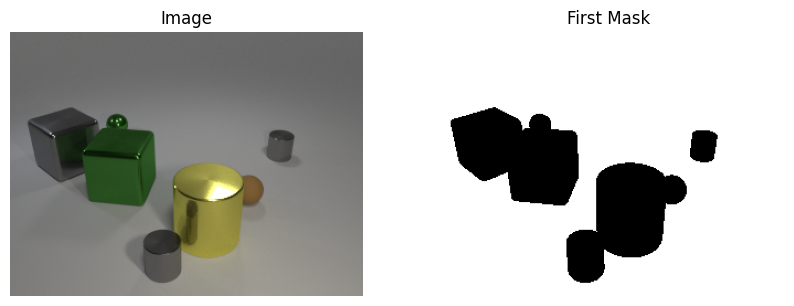

Original mask shape: (11, 240, 320, 1)
First mask shape: (240, 320)


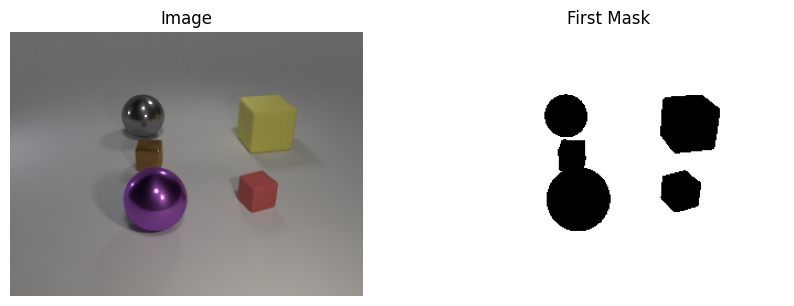

Original mask shape: (11, 240, 320, 1)
First mask shape: (240, 320)


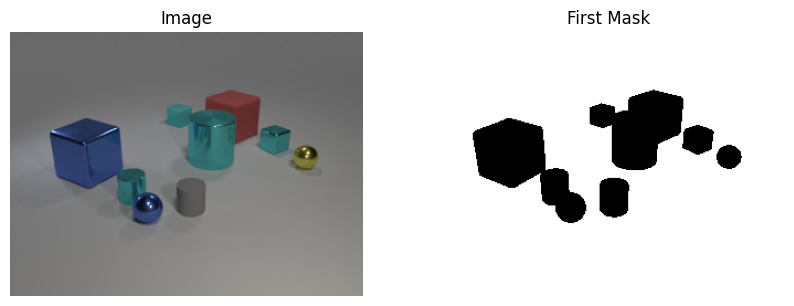

Original mask shape: (11, 240, 320, 1)
First mask shape: (240, 320)


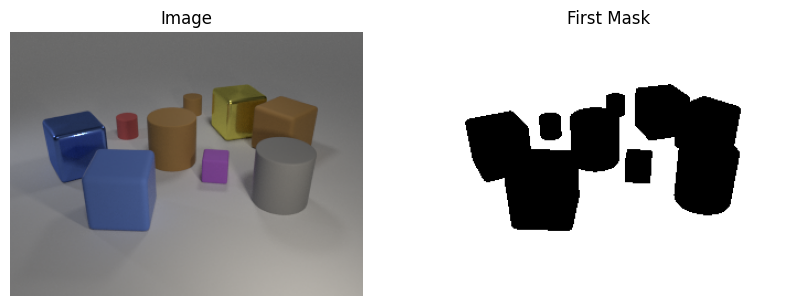

Original mask shape: (11, 240, 320, 1)
First mask shape: (240, 320)


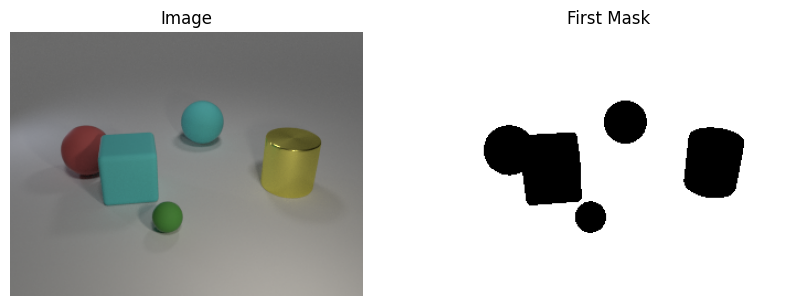

Original mask shape: (11, 240, 320, 1)
First mask shape: (240, 320)


KeyboardInterrupt: 

In [2]:
from multi_object_datasets import clevr_with_masks
import tensorflow as tf
import matplotlib.pyplot as plt

tf_records_path = 'clevr_with_masks_train.tfrecords'
batch_size = 32

# Create the dataset
dataset = clevr_with_masks.dataset(tf_records_path, batch_size)
batched_dataset = dataset.batch(batch_size)  # optional batching

# Iterate over the entire dataset and display the images and masks
for batch in batched_dataset:  # Iterate over all batches
    # Print the keys available in the batch
    print(batch.keys())
    
    images = batch['image']
    masks = batch['mask']
    
    for i in range(len(images)):
        image = images[i].numpy()
        mask = masks[i].numpy()
        
        # Print the shape of the mask
        print(f"Original mask shape: {mask.shape}")
        
        # Display only the first mask for the image
        first_mask = mask[0, :, :, 0]
        
        # Print the shape of the first mask
        print(f"First mask shape: {first_mask.shape}")
        
        plt.figure(figsize=(10, 5))
        
        # Display the image
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.title("Image")
        plt.axis('off')
        
        # Display the first mask
        plt.subplot(1, 2, 2)
        plt.imshow(first_mask, cmap='gray')
        plt.title("First Mask")
        plt.axis('off')
        
        plt.show()
        plt.close()  # Close the figure to avoid memory issues